In [28]:
import requests
import matplotlib
import pandas
from urllib.parse import urlencode
import json

# Helpful site: https://api.inaturalist.org/v1/docs/#!/Observations/get_observations
# look for the taxon ids and place ids in the urls on the web site.

q = {
    "taxon_id": 36514, # green anole
    "d1": "2016-01-01",
    "d2": "2018-06-30",
    "order": "desc",
    "order_by": "created_at",
    "place_id": 30, # north carolina
}
url = "https://api.inaturalist.org/v1/observations?"

z = pandas.DataFrame()

page = 1
while True:
    q['page'] = page
    r = requests.get(url, params = q)
    
    results = r.json()["results"]
    z = pandas.concat([z, pandas.DataFrame(r.json()["results"])])

    if r.json()["results"] == []:
        print("no more results, stopping")
        break
    if page > 999:
        break
        
    if page == 1:
        num_pages = int(r.json()["total_results"] / r.json()["per_page"])+1
        print("Results: " + r.json()["total_results"] + ", " + num_pages + " pages total")
    print("Retrieving page ", page)
    page += 1

z['created_at'] = pandas.to_datetime(z['created_at'])
z = z.set_index('created_at')

Results:  417 ,  14  pages total
Retrieving page  1
Retrieving page  2
Retrieving page  3
Retrieving page  4
Retrieving page  5
Retrieving page  6
Retrieving page  7
Retrieving page  8
Retrieving page  9
Retrieving page  10
Retrieving page  11
Retrieving page  12
Retrieving page  13
Retrieving page  14
no more results, stopping


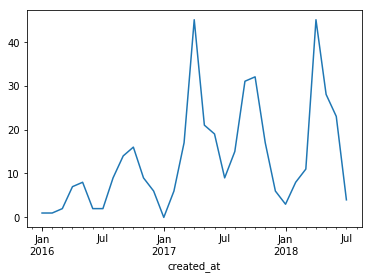

In [27]:
#
# This shows a chart of the count of observations by month
# 
zz = z["uri"].groupby(pandas.Grouper(freq='M')).count()
zz.plot()